In [1]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python3)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 9.3.0
-- The CXX compiler identification is GNU 9.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /home/dago/anaconda3/envs/tp2/bin/python3 (found version "3.6.5") 
-- Found PythonLibs: /home/dago/anaconda3/envs/tp2/lib/libpython3.6m.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/dago/Desktop/Facultad/MN/MNtp2/metnum-tp2-1C2021/tp2

In [2]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import metnum
%load_ext autoreload
%autoreload 2
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import time
import os
import sys
import numpy as np

/home/dago/Desktop/Facultad/MN/MNtp2/metnum-tp2-1C2021/tp2-alu/tp2/notebooks
Python 3.6.5 :: Anaconda, Inc.


# Instancias de train and test


In [3]:
%%time

filename = "../data/train.csv"

def get_data_set(filepath, total_instances):
    df_train = pd.read_csv(filepath)
    df_train = df_train[:total_instances]
    
    # Uso values para mandar todo a arrays de numpy
    X = df_train[df_train.columns[1:]].values
    y = df_train["label"].values.reshape(-1, 1)
    
    return X, y

def main(filename, k, alpha, method, total_instances = 32000, num_iter = 1000, train_percentage = 0.8, epsilon = 1e-6 ):
    X, y = get_data_set(filename, total_instances)
    
    # take some instances for train and other for validation
    limit = int(train_percentage * X.shape[0]) 

    X_train, label_train = X[:limit], y[:limit]
    X_val, label_val = X[limit:], y[limit:]

    assert len(X_train) == len(label_train)
    assert len(X_val) == len(label_val)

    clf = metnum.KNNClassifier(k)
    
    if (method == "KNN"):
        clf.fit(X_train, label_train)
        
    if (method == "KNN_PCA"):
        pca = metnum.PCA(alpha, num_iter, epsilon)
        pca.fit(X_train)

        X_train = pca.transform(X_train)
        X_val = pca.transform(X_val)
        
        clf.fit(X_train, label_train) 

    from sklearn.metrics import accuracy_score
    label_pred = clf.predict(X_val)

    acc = accuracy_score(label_val, label_pred)
    print("Accuracy: {}".format(acc))
    return acc

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.39 µs


In [5]:
%%time
main(filename, 1, 15, "KNN_PCA", 5000, 1000, 0.8, 1e-8)


Accuracy: 0.923
CPU times: user 7.42 s, sys: 447 ms, total: 7.86 s
Wall time: 7.66 s


# Testing -------------------------------------------


In [10]:
# test 1
import numpy as np
A = np.array([[ 62,   4, -52],
 [  4,   4,  -4],
 [-52,  -4,  44]])

w, V = metnum.get_first_eigenvalues(A, 3, 5000, 1e-8)

for i in range(len(A)):
    print(np.allclose(A @ V[:, i], w[i] * V[:,i]))
    print(A @ V[:, i])
    print(w[i] * V[:,i])

True
[-81.01699942  -5.84815982  68.23429144]
[-81.01699942  -5.84815982  68.23429144]
True
[-0.485262    3.71464028 -0.25779796]
[-0.485262    3.71464028 -0.25779796]
True
[0.10161836 0.02177798 0.12252162]
[0.10161836 0.02177798 0.12252162]


In [18]:
def get_x_by_label(data, labels, label ):
    result_x = []
    result_y = []
    for i in range(0,len(data)):
        if (labels[i] == label):
            result_x.append(data[i][0])
            result_y.append(data[i][1])
    return result_x, result_y

In [84]:
# Test 2 PCA
filename = "../data/train.csv"
alpha = 2
k = 1
total_instances = 100
train_percentage = 0.95
num_iter = 1000
epsilon = 1e-10

X, y = get_data_set(filename, total_instances)

# take some instances for train and other for validation
limit = int(train_percentage * X.shape[0]) 

X_train, label_train = X[:limit], y[:limit]
X_val, label_val = X[limit:], y[limit:]

assert len(X_train) == len(label_train)
assert len(X_val) == len(label_val)

clf = metnum.KNNClassifier(k)

pca = metnum.PCA(alpha, num_iter, epsilon)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_val = pca.transform(X_val)

clf.fit(X_train, label_train) 

from sklearn.metrics import accuracy_score
label_pred = clf.predict(X_val)

acc = accuracy_score(label_val, label_pred)
print("Accuracy: {}".format(acc))




Accuracy: 0.6


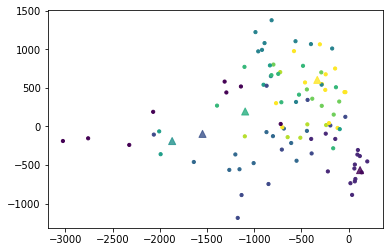

In [90]:
plt.scatter(X_train[:,0], X_train[:,1],s=10 ,c = label_train, alpha = 1)
plt.scatter(X_val[:,0], X_val[:,1], c = label_pred, s = 50, marker='^', alpha = 0.8)

plt.show()


# Implementación
- En el metodo de la potencia verificamos al final que se trate de un autovector de X con precision epsilon
- 

# Metodo para parar el metodo de la potencia
- research
- - http://www.cse.psu.edu/~b58/cse456/lecture11.pdf
- - || wk - wk+1 || inf < e
- - https://www-users.cs.umn.edu/~saad/eig_book_2ndEd.pdf
- - pag 59(69) seccion 3.2: r = Au~ - lambda~u~, r es el vector residual

- - talvez se puede usar lambda -> descartado porque habia que computar el autovalor adentro del ciclo en cada iteracion, lo cual es cosotoso.
- elegir 2/3 metodos y evaluar su eficiencia en base a la perfomance de tiempo y a distancia de los resultados obtenidos

In [5]:
%%time
# Sin método de terminación
for iterations in tqdm([1000, 2000, 3000]):
    time_init = time.perf_counter()
    main(filename, 1, 15, "KNN_PCA", 5000, iterations, 0.8, 1e-8)
    time_end = time.perf_counter()
    print("Iteration: ", iterations, " time: ", f"{time_end- time_init:0.4f}")

# Accuracy: 0.923
# Iteration:  1000  time:  8.2160
        
# Accuracy: 0.923
# Iteration:  2000  time:  10.8136
        
# Accuracy: 0.923
# Iteration:  3000  time:  12.2737

 33%|███▎      | 1/3 [00:08<00:16,  8.22s/it]

Accuracy: 0.923
Iteration:  1000  time:  8.2160


 67%|██████▋   | 2/3 [00:19<00:09,  9.74s/it]

Accuracy: 0.923
Iteration:  2000  time:  10.8136


100%|██████████| 3/3 [00:31<00:00, 10.44s/it]

Accuracy: 0.923
Iteration:  3000  time:  12.2737
CPU times: user 30.7 s, sys: 762 ms, total: 31.4 s
Wall time: 31.3 s


In [4]:
# || wk - wk+1 || inf < e
for iterations in tqdm([1000, 2000, 3000]):
    time_init = time.perf_counter()
    main(filename, 1, 15, "KNN_PCA", 5000, iterations, 0.8, 1e-8)
    time_end = time.perf_counter()
    print("Iteration: ", iterations, " time: ", f"{time_end- time_init:0.4f}")
    
# considerar que b es random por eso los resultados
# Accuracy: 0.923
# Iteration:  1000  time:  4.7722
        
# Accuracy: 0.923
# Iteration:  2000  time:  4.5494
        
# Accuracy: 0.923
# Iteration:  3000  time:  4.5293

 33%|███▎      | 1/3 [00:05<00:10,  5.42s/it]

Accuracy: 0.923
Iteration:  1000  time:  5.4148


 67%|██████▋   | 2/3 [00:10<00:05,  5.05s/it]

Accuracy: 0.923
Iteration:  2000  time:  4.7880


100%|██████████| 3/3 [00:14<00:00,  4.98s/it]

Accuracy: 0.923
Iteration:  3000  time:  4.7343


In [5]:
# pag 59(69) seccion 3.2: r = Au~ - lambda~u~, r es el vector residual
for iterations in tqdm([1000, 2000, 3000]):
    time_init = time.perf_counter()
    main(filename, 1, 15, "KNN_PCA", 5000, iterations, 0.8, 1e-8)
    time_end = time.perf_counter()
    print("Iteration: ", iterations, " time: ", f"{time_end- time_init:0.4f}")
    
# Accuracy: 0.923
# Iteration:  1000  time:  6.3910
        
# Accuracy: 0.923
# Iteration:  2000  time:  6.1160
        
# Accuracy: 0.923
# Iteration:  3000  time:  6.4459  

 33%|███▎      | 1/3 [00:06<00:13,  6.97s/it]

Accuracy: 0.923
Iteration:  1000  time:  6.9683


 67%|██████▋   | 2/3 [00:13<00:06,  6.60s/it]

Accuracy: 0.923
Iteration:  2000  time:  6.3405


100%|██████████| 3/3 [00:19<00:00,  6.45s/it]

Accuracy: 0.923
Iteration:  3000  time:  6.0369


**Decidimos quedarnos con el primer criterio ya que al no calcular los autovalores en cada iteracíon obtuvo una perfomance mejor que el 2do criterio de finalizacion para el método de la potencia. Y ademas observamos que las iteraciones se vieron altamente reducidas(Mejora con la cantidad de iteraciones, ya que cuando converge el resto de las iteraciones son innecesarias)**

# Experimentar con la k
- Encontrar primero del 1 al 200 de a saltos de a 10
- Hipotesis: va a estar entre los primeros ya que tener en cuenta demasiados puntos mas cercanos deja de tener sentido
- Luego concluir que esta entre los primeros y hacer del 1 al 20

*Vamos a experimentar con: Intancias 10000, porcentage 0.8, epsilon 1e-8, iteraciones 1000(Si en 1000 no convergio nos conviene tomar un nuevo X0)*

## KNN sin PCA

In [22]:
name = "../dataExp/expKNN_1-200.csv"
accuracy = []
times = []

total_instances = 10000

for k in tqdm(range(1,201,10)):
    time_init = time.perf_counter()
    acc = main("../data/train.csv", k, 0, "KNN", total_instances, 1000, 0.8, 1e-8)
    time_end = time.perf_counter()
    
    times.append(time_end-time_init)
    accuracy.append(acc)
np.savetxt(name, np.array([times, accuracy]).transpose(), delimiter=",")

  5%|▌         | 1/20 [00:16<05:22, 16.98s/it]

Accuracy: 0.952


 10%|█         | 2/20 [00:34<05:16, 17.57s/it]

Accuracy: 0.81


 15%|█▌        | 3/20 [00:53<05:02, 17.78s/it]

Accuracy: 0.6955


 20%|██        | 4/20 [01:11<04:47, 17.99s/it]

Accuracy: 0.6095


 25%|██▌       | 5/20 [01:30<04:35, 18.37s/it]

Accuracy: 0.544


 30%|███       | 6/20 [01:50<04:23, 18.82s/it]

Accuracy: 0.493


 35%|███▌      | 7/20 [02:10<04:11, 19.35s/it]

Accuracy: 0.457


 40%|████      | 8/20 [02:31<03:57, 19.78s/it]

Accuracy: 0.4245


 45%|████▌     | 9/20 [02:52<03:42, 20.23s/it]

Accuracy: 0.395


 50%|█████     | 10/20 [03:14<03:26, 20.67s/it]

Accuracy: 0.372


 55%|█████▌    | 11/20 [03:36<03:10, 21.21s/it]

Accuracy: 0.3455


 60%|██████    | 12/20 [03:59<02:53, 21.63s/it]

Accuracy: 0.3265


 65%|██████▌   | 13/20 [04:22<02:35, 22.19s/it]

Accuracy: 0.306


 70%|███████   | 14/20 [04:46<02:16, 22.71s/it]

Accuracy: 0.289


 75%|███████▌  | 15/20 [05:10<01:55, 23.16s/it]

Accuracy: 0.274


 80%|████████  | 16/20 [05:35<01:34, 23.62s/it]

Accuracy: 0.2585


 85%|████████▌ | 17/20 [06:00<01:12, 24.01s/it]

Accuracy: 0.2475


 90%|█████████ | 18/20 [06:25<00:48, 24.45s/it]

Accuracy: 0.237


 95%|█████████▌| 19/20 [06:52<00:25, 25.06s/it]

Accuracy: 0.226


100%|██████████| 20/20 [07:19<00:00, 21.96s/it]

Accuracy: 0.2135


FileNotFoundError: [Errno 2] No such file or directory: '../dataExp/expKNN_1-200.csv'

In [4]:
name_1_10 = "../dataExp/expKNN_1-10.csv"
accuracy_1_10 = []
times_1_10 = []

total_instances = 10000

for k in tqdm(range(1,10)):
    time_init = time.perf_counter()
    acc = main("../data/train.csv", k, 0, "KNN", total_instances, 1000, 0.8, 1e-8)
    time_end = time.perf_counter()
    
    times_1_10.append(time_end-time_init)
    accuracy_1_10.append(acc)
np.savetxt(name_1_10, np.array([times_1_10, accuracy_1_10]).transpose(), delimiter=",")

  0%|          | 0/9 [00:00<?, ?it/s]


KeyboardInterrupt: 

## KNN con PCA 
0 < alpha < 500, [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500] 

0 < k < 200 [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100, 200]

In [4]:
name_k_alpha_complete = "../dataExp/KNN_PCA_complete.csv"
accuracy_k_alpha_complete = []
times_k_alpha_complete = []
ks_complete = []
alphas_complete = []

total_instances = 10000
ks = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100, 200]
alphas = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100, 200]

with tqdm(total=len(ks) * len(alphas)) as pbar:
    for k in ks:
        for alpha in alphas:
            time_init = time.perf_counter()
            acc = main("../data/train.csv", k, alpha, "KNN_PCA", total_instances, 2500, 0.8, 1e-6)
            time_end = time.perf_counter()
            print(f"K: {k}, Alpha: {alpha}")
    
            times_k_alpha_complete.append(time_end-time_init)
            accuracy_k_alpha_complete.append(acc)
            ks_complete.append(k)
            alphas_complete.append(alpha)
            
            pbar.update(1)

np.savetxt(name_k_alpha_complete, np.array([ks_complete, alphas_complete, times_k_alpha_complete, accuracy_k_alpha_complete]).transpose(), delimiter=",")

  1%|          | 1/144 [00:05<12:01,  5.05s/it]

Accuracy: 0.2515
K: 1, Alpha: 1


  1%|▏         | 2/144 [00:09<11:16,  4.77s/it]

Accuracy: 0.366
K: 1, Alpha: 2


  2%|▏         | 3/144 [00:14<10:49,  4.61s/it]

Accuracy: 0.476
K: 1, Alpha: 3


  3%|▎         | 4/144 [00:18<10:36,  4.54s/it]

Accuracy: 0.5835
K: 1, Alpha: 4


  3%|▎         | 5/144 [00:23<10:31,  4.54s/it]

Accuracy: 0.691
K: 1, Alpha: 5


  4%|▍         | 6/144 [00:27<10:34,  4.60s/it]

Accuracy: 0.8925
K: 1, Alpha: 10


  5%|▍         | 7/144 [00:33<11:10,  4.89s/it]

Accuracy: 0.951
K: 1, Alpha: 20


  6%|▌         | 8/144 [00:39<11:56,  5.27s/it]

Accuracy: 0.9655
K: 1, Alpha: 30


  6%|▋         | 9/144 [00:46<12:52,  5.72s/it]

Accuracy: 0.9645
K: 1, Alpha: 40


  7%|▋         | 10/144 [00:53<14:02,  6.29s/it]

Accuracy: 0.965
K: 1, Alpha: 50


  8%|▊         | 11/144 [01:06<18:29,  8.34s/it]

Accuracy: 0.963
K: 1, Alpha: 100


  8%|▊         | 12/144 [02:23<1:04:04, 29.12s/it]

Accuracy: 0.9525
K: 1, Alpha: 200


  9%|▉         | 13/144 [02:27<47:20, 21.69s/it]  

Accuracy: 0.2235
K: 2, Alpha: 1


 10%|▉         | 14/144 [02:32<35:44, 16.50s/it]

Accuracy: 0.3715
K: 2, Alpha: 2


 10%|█         | 15/144 [02:36<27:43, 12.89s/it]

Accuracy: 0.4535
K: 2, Alpha: 3


 11%|█         | 16/144 [02:41<22:09, 10.38s/it]

Accuracy: 0.5765
K: 2, Alpha: 4


 12%|█▏        | 17/144 [02:46<18:17,  8.64s/it]

Accuracy: 0.6755
K: 2, Alpha: 5


 12%|█▎        | 18/144 [02:50<15:45,  7.51s/it]

Accuracy: 0.879
K: 2, Alpha: 10


 13%|█▎        | 19/144 [02:56<14:25,  6.92s/it]

Accuracy: 0.9425
K: 2, Alpha: 20


 14%|█▍        | 20/144 [03:02<13:48,  6.68s/it]

Accuracy: 0.9555
K: 2, Alpha: 30


 15%|█▍        | 21/144 [03:09<13:42,  6.69s/it]

Accuracy: 0.954
K: 2, Alpha: 40


 15%|█▌        | 22/144 [03:16<14:00,  6.89s/it]

Accuracy: 0.9525
K: 2, Alpha: 50


 16%|█▌        | 23/144 [03:29<17:43,  8.79s/it]

Accuracy: 0.952
K: 2, Alpha: 100


 17%|█▋        | 24/144 [05:15<1:15:56, 37.97s/it]

Accuracy: 0.948
K: 2, Alpha: 200


 17%|█▋        | 25/144 [05:20<55:26, 27.96s/it]  

Accuracy: 0.222
K: 3, Alpha: 1


 18%|█▊        | 26/144 [05:25<41:10, 20.93s/it]

Accuracy: 0.36
K: 3, Alpha: 2


 19%|█▉        | 27/144 [05:29<31:15, 16.03s/it]

Accuracy: 0.425
K: 3, Alpha: 3


 19%|█▉        | 28/144 [05:34<24:23, 12.62s/it]

Accuracy: 0.5515
K: 3, Alpha: 4


 20%|██        | 29/144 [05:38<19:37, 10.24s/it]

Accuracy: 0.649
K: 3, Alpha: 5


 21%|██        | 30/144 [05:43<16:25,  8.64s/it]

Accuracy: 0.854
K: 3, Alpha: 10


 22%|██▏       | 31/144 [05:49<14:33,  7.73s/it]

Accuracy: 0.9255
K: 3, Alpha: 20


 22%|██▏       | 32/144 [05:55<13:38,  7.31s/it]

Accuracy: 0.9315
K: 3, Alpha: 30


 23%|██▎       | 33/144 [06:02<13:17,  7.18s/it]

Accuracy: 0.935
K: 3, Alpha: 40


 24%|██▎       | 34/144 [06:10<13:25,  7.32s/it]

Accuracy: 0.9335
K: 3, Alpha: 50


 24%|██▍       | 35/144 [06:23<16:29,  9.08s/it]

Accuracy: 0.9345
K: 3, Alpha: 100


 25%|██▌       | 36/144 [07:38<51:44, 28.75s/it]

Accuracy: 0.934
K: 3, Alpha: 200


 26%|██▌       | 37/144 [07:42<38:22, 21.52s/it]

Accuracy: 0.207
K: 4, Alpha: 1


 26%|██▋       | 38/144 [07:47<29:03, 16.44s/it]

Accuracy: 0.348
K: 4, Alpha: 2


 27%|██▋       | 39/144 [07:52<22:34, 12.90s/it]

Accuracy: 0.409
K: 4, Alpha: 3


 28%|██▊       | 40/144 [07:56<18:03, 10.42s/it]

Accuracy: 0.5315
K: 4, Alpha: 4


 28%|██▊       | 41/144 [08:01<14:56,  8.70s/it]

Accuracy: 0.6285
K: 4, Alpha: 5


 29%|██▉       | 42/144 [08:06<12:51,  7.56s/it]

Accuracy: 0.825
K: 4, Alpha: 10


 30%|██▉       | 43/144 [08:12<11:50,  7.04s/it]

Accuracy: 0.904
K: 4, Alpha: 20


 31%|███       | 44/144 [08:18<11:24,  6.84s/it]

Accuracy: 0.9145
K: 4, Alpha: 30


 31%|███▏      | 45/144 [08:25<11:18,  6.86s/it]

Accuracy: 0.9165
K: 4, Alpha: 40


 32%|███▏      | 46/144 [08:33<11:39,  7.14s/it]

Accuracy: 0.9185
K: 4, Alpha: 50


 33%|███▎      | 47/144 [08:46<14:30,  8.97s/it]

Accuracy: 0.9145
K: 4, Alpha: 100


 33%|███▎      | 48/144 [11:45<1:36:00, 60.00s/it]

Accuracy: 0.916
K: 4, Alpha: 200


 34%|███▍      | 49/144 [11:50<1:08:52, 43.50s/it]

Accuracy: 0.205
K: 5, Alpha: 1


 35%|███▍      | 50/144 [11:55<50:02, 31.94s/it]  

Accuracy: 0.3365
K: 5, Alpha: 2


 35%|███▌      | 51/144 [12:00<36:50, 23.77s/it]

Accuracy: 0.393
K: 5, Alpha: 3


 36%|███▌      | 52/144 [12:04<27:39, 18.04s/it]

Accuracy: 0.51
K: 5, Alpha: 4


 37%|███▋      | 53/144 [12:09<21:19, 14.06s/it]

Accuracy: 0.6065
K: 5, Alpha: 5


 38%|███▊      | 54/144 [12:14<17:00, 11.34s/it]

Accuracy: 0.805
K: 5, Alpha: 10


 38%|███▊      | 55/144 [12:20<14:22,  9.69s/it]

Accuracy: 0.882
K: 5, Alpha: 20


 39%|███▉      | 56/144 [12:26<12:42,  8.67s/it]

Accuracy: 0.8985
K: 5, Alpha: 30


 40%|███▉      | 57/144 [12:33<11:50,  8.17s/it]

Accuracy: 0.9055
K: 5, Alpha: 40


 40%|████      | 58/144 [12:41<11:28,  8.00s/it]

Accuracy: 0.9005
K: 5, Alpha: 50


 41%|████      | 59/144 [12:54<13:24,  9.46s/it]

Accuracy: 0.8965
K: 5, Alpha: 100


 42%|████▏     | 60/144 [13:43<30:03, 21.47s/it]

Accuracy: 0.895
K: 5, Alpha: 200


 42%|████▏     | 61/144 [13:48<22:51, 16.53s/it]

Accuracy: 0.18
K: 10, Alpha: 1


 43%|████▎     | 62/144 [13:53<17:47, 13.02s/it]

Accuracy: 0.2965
K: 10, Alpha: 2


 44%|████▍     | 63/144 [13:58<14:18, 10.60s/it]

Accuracy: 0.34
K: 10, Alpha: 3


 44%|████▍     | 64/144 [14:03<11:50,  8.88s/it]

Accuracy: 0.436
K: 10, Alpha: 4


 45%|████▌     | 65/144 [14:08<10:08,  7.71s/it]

Accuracy: 0.528
K: 10, Alpha: 5


 46%|████▌     | 66/144 [14:13<09:03,  6.97s/it]

Accuracy: 0.7185
K: 10, Alpha: 10


 47%|████▋     | 67/144 [14:19<08:34,  6.69s/it]

Accuracy: 0.8155
K: 10, Alpha: 20


 47%|████▋     | 68/144 [14:26<08:27,  6.67s/it]

Accuracy: 0.8235
K: 10, Alpha: 30


 48%|████▊     | 69/144 [14:33<08:35,  6.87s/it]

Accuracy: 0.831
K: 10, Alpha: 40


 49%|████▊     | 70/144 [14:42<09:04,  7.35s/it]

Accuracy: 0.828
K: 10, Alpha: 50


 49%|████▉     | 71/144 [14:58<12:15, 10.08s/it]

Accuracy: 0.8275
K: 10, Alpha: 100


 50%|█████     | 72/144 [18:41<1:28:54, 74.09s/it]

Accuracy: 0.8245
K: 10, Alpha: 200


 51%|█████     | 73/144 [18:47<1:03:26, 53.62s/it]

Accuracy: 0.149
K: 20, Alpha: 1


 51%|█████▏    | 74/144 [18:53<45:47, 39.25s/it]  

Accuracy: 0.2525
K: 20, Alpha: 2


 52%|█████▏    | 75/144 [18:59<33:35, 29.22s/it]

Accuracy: 0.2805
K: 20, Alpha: 3


 53%|█████▎    | 76/144 [19:05<25:08, 22.18s/it]

Accuracy: 0.363
K: 20, Alpha: 4


 53%|█████▎    | 77/144 [19:11<19:25, 17.39s/it]

Accuracy: 0.4435
K: 20, Alpha: 5


 54%|█████▍    | 78/144 [19:17<15:29, 14.08s/it]

Accuracy: 0.607
K: 20, Alpha: 10


 55%|█████▍    | 79/144 [19:25<13:08, 12.13s/it]

Accuracy: 0.7005
K: 20, Alpha: 20


 56%|█████▌    | 80/144 [19:33<11:50, 11.11s/it]

Accuracy: 0.711
K: 20, Alpha: 30


 56%|█████▋    | 81/144 [19:42<10:57, 10.44s/it]

Accuracy: 0.714
K: 20, Alpha: 40


 57%|█████▋    | 82/144 [19:53<10:48, 10.45s/it]

Accuracy: 0.7195
K: 20, Alpha: 50


 58%|█████▊    | 83/144 [20:14<13:49, 13.61s/it]

Accuracy: 0.7165
K: 20, Alpha: 100


 58%|█████▊    | 84/144 [22:36<52:19, 52.33s/it]

Accuracy: 0.705
K: 20, Alpha: 200


 59%|█████▉    | 85/144 [22:43<37:50, 38.49s/it]

Accuracy: 0.1395
K: 30, Alpha: 1


 60%|█████▉    | 86/144 [22:49<27:54, 28.88s/it]

Accuracy: 0.23
K: 30, Alpha: 2


 60%|██████    | 87/144 [22:55<21:01, 22.14s/it]

Accuracy: 0.249
K: 30, Alpha: 3


 61%|██████    | 88/144 [23:02<16:15, 17.42s/it]

Accuracy: 0.3155
K: 30, Alpha: 4


 62%|██████▏   | 89/144 [23:08<12:58, 14.16s/it]

Accuracy: 0.3895
K: 30, Alpha: 5


 62%|██████▎   | 90/144 [23:15<10:41, 11.89s/it]

Accuracy: 0.533
K: 30, Alpha: 10


 63%|██████▎   | 91/144 [23:23<09:25, 10.66s/it]

Accuracy: 0.6095
K: 30, Alpha: 20


 64%|██████▍   | 92/144 [23:31<08:39,  9.99s/it]

Accuracy: 0.623
K: 30, Alpha: 30


 65%|██████▍   | 93/144 [23:40<08:14,  9.70s/it]

Accuracy: 0.6265
K: 30, Alpha: 40


 65%|██████▌   | 94/144 [23:50<08:04,  9.70s/it]

Accuracy: 0.624
K: 30, Alpha: 50


 66%|██████▌   | 95/144 [24:05<09:19, 11.42s/it]

Accuracy: 0.618
K: 30, Alpha: 100


 67%|██████▋   | 96/144 [26:17<37:57, 47.44s/it]

Accuracy: 0.6195
K: 30, Alpha: 200


 67%|██████▋   | 97/144 [26:23<27:32, 35.16s/it]

Accuracy: 0.1325
K: 40, Alpha: 1


 68%|██████▊   | 98/144 [26:30<20:22, 26.58s/it]

Accuracy: 0.2175
K: 40, Alpha: 2


 69%|██████▉   | 99/144 [26:37<15:29, 20.66s/it]

Accuracy: 0.2345
K: 40, Alpha: 3


 69%|██████▉   | 100/144 [26:44<12:08, 16.55s/it]

Accuracy: 0.2855
K: 40, Alpha: 4


 70%|███████   | 101/144 [26:51<09:49, 13.72s/it]

Accuracy: 0.346
K: 40, Alpha: 5


 71%|███████   | 102/144 [26:58<08:15, 11.79s/it]

Accuracy: 0.4725
K: 40, Alpha: 10


 72%|███████▏  | 103/144 [27:06<07:14, 10.60s/it]

Accuracy: 0.552
K: 40, Alpha: 20


 72%|███████▏  | 104/144 [27:15<06:41, 10.03s/it]

Accuracy: 0.567
K: 40, Alpha: 30


 73%|███████▎  | 105/144 [27:23<06:16,  9.65s/it]

Accuracy: 0.564
K: 40, Alpha: 40


 74%|███████▎  | 106/144 [27:33<06:07,  9.67s/it]

Accuracy: 0.5625
K: 40, Alpha: 50


 74%|███████▍  | 107/144 [27:49<07:08, 11.59s/it]

Accuracy: 0.5535
K: 40, Alpha: 100


 75%|███████▌  | 108/144 [31:59<49:52, 83.13s/it]

Accuracy: 0.551
K: 40, Alpha: 200


 76%|███████▌  | 109/144 [32:06<35:09, 60.26s/it]

Accuracy: 0.1255
K: 50, Alpha: 1


 76%|███████▋  | 110/144 [32:13<25:04, 44.25s/it]

Accuracy: 0.2015
K: 50, Alpha: 2


 77%|███████▋  | 111/144 [32:20<18:10, 33.05s/it]

Accuracy: 0.221
K: 50, Alpha: 3


 78%|███████▊  | 112/144 [32:27<13:27, 25.24s/it]

Accuracy: 0.2665
K: 50, Alpha: 4


 78%|███████▊  | 113/144 [32:34<10:12, 19.77s/it]

Accuracy: 0.3135
K: 50, Alpha: 5


 79%|███████▉  | 114/144 [32:41<08:02, 16.07s/it]

Accuracy: 0.434
K: 50, Alpha: 10


 80%|███████▉  | 115/144 [32:50<06:39, 13.78s/it]

Accuracy: 0.4965
K: 50, Alpha: 20


 81%|████████  | 116/144 [32:58<05:41, 12.21s/it]

Accuracy: 0.5045
K: 50, Alpha: 30


 81%|████████▏ | 117/144 [33:08<05:08, 11.42s/it]

Accuracy: 0.506
K: 50, Alpha: 40


 82%|████████▏ | 118/144 [33:19<04:55, 11.37s/it]

Accuracy: 0.5015
K: 50, Alpha: 50


 83%|████████▎ | 119/144 [33:36<05:22, 12.91s/it]

Accuracy: 0.504
K: 50, Alpha: 100


 83%|████████▎ | 120/144 [36:05<21:31, 53.80s/it]

Accuracy: 0.507
K: 50, Alpha: 200


 84%|████████▍ | 121/144 [36:14<15:29, 40.43s/it]

Accuracy: 0.104
K: 100, Alpha: 1


 85%|████████▍ | 122/144 [36:24<11:24, 31.12s/it]

Accuracy: 0.162
K: 100, Alpha: 2


 85%|████████▌ | 123/144 [36:33<08:36, 24.60s/it]

Accuracy: 0.178
K: 100, Alpha: 3


 86%|████████▌ | 124/144 [36:43<06:42, 20.10s/it]

Accuracy: 0.1955
K: 100, Alpha: 4


 87%|████████▋ | 125/144 [36:52<05:21, 16.94s/it]

Accuracy: 0.2285
K: 100, Alpha: 5


 88%|████████▊ | 126/144 [37:02<04:25, 14.77s/it]

Accuracy: 0.3165
K: 100, Alpha: 10


 88%|████████▊ | 127/144 [37:12<03:49, 13.50s/it]

Accuracy: 0.346
K: 100, Alpha: 20


 89%|████████▉ | 128/144 [37:23<03:23, 12.74s/it]

Accuracy: 0.3435
K: 100, Alpha: 30


 90%|████████▉ | 129/144 [37:35<03:05, 12.34s/it]

Accuracy: 0.3505
K: 100, Alpha: 40


 90%|█████████ | 130/144 [37:47<02:52, 12.33s/it]

Accuracy: 0.352
K: 100, Alpha: 50


 91%|█████████ | 131/144 [38:05<03:03, 14.10s/it]

Accuracy: 0.35
K: 100, Alpha: 100


 92%|█████████▏| 132/144 [39:36<07:24, 37.04s/it]

Accuracy: 0.3495
K: 100, Alpha: 200


 92%|█████████▏| 133/144 [39:50<05:32, 30.26s/it]

Accuracy: 0.0995
K: 200, Alpha: 1


 93%|█████████▎| 134/144 [40:05<04:16, 25.69s/it]

Accuracy: 0.124
K: 200, Alpha: 2


 94%|█████████▍| 135/144 [40:20<03:20, 22.30s/it]

Accuracy: 0.136
K: 200, Alpha: 3


 94%|█████████▍| 136/144 [40:35<02:40, 20.08s/it]

Accuracy: 0.1365
K: 200, Alpha: 4


 95%|█████████▌| 137/144 [40:49<02:09, 18.46s/it]

Accuracy: 0.1515
K: 200, Alpha: 5


 96%|█████████▌| 138/144 [41:04<01:43, 17.28s/it]

Accuracy: 0.171
K: 200, Alpha: 10


 97%|█████████▋| 139/144 [41:19<01:23, 16.74s/it]

Accuracy: 0.193
K: 200, Alpha: 20


 97%|█████████▋| 140/144 [41:36<01:07, 16.78s/it]

Accuracy: 0.192
K: 200, Alpha: 30


 98%|█████████▊| 141/144 [41:53<00:50, 16.78s/it]

Accuracy: 0.192
K: 200, Alpha: 40


 99%|█████████▊| 142/144 [42:11<00:34, 17.04s/it]

Accuracy: 0.1935
K: 200, Alpha: 50


 99%|█████████▉| 143/144 [42:34<00:18, 18.94s/it]

Accuracy: 0.2025
K: 200, Alpha: 100


100%|██████████| 144/144 [43:58<00:00, 18.32s/it]

Accuracy: 0.2045
K: 200, Alpha: 200


- Graficos: 15 graficos con k fijo, acc(alpha)
- Mismo grafico todos overlapeados
- Alpha en X, k en Y, colorcitos para rangos de acc(rojo, amarrillo verde)


# Experimentar con el alpha
- Research paper de buenos alphas
- **Experimentar**: Experimentacion similar a la de K pero el inicial talvez mejor hasta 600 o algo del estilo para tener un panorama mas completo ya que no se espepra que al aumentarlo empeore necesariamente


# Experimentar con la cantidad de instancias 
- para distintos k/alpha?


# Posible metodo KNN pesado
- Por orden(sencillo pero no tan bueno talvez)
- Por distancia con peso

# Metricas para determinar los resultados obtenidos que no son accuracy
- Accuracy
- Curvas de precisión
- Recall
- Kappa de Cohen
- F1 Score

# Formas de tomar la data para entrenar
- Ver la distribución de los datos
- Como tomarlos

# Otros requisitos
- Se pide realizar un estudio experimental de los métodos propuestos sobre una base de
entrenamiento utilizando la técnica K-fold cross validation mencionada anteriormente, con
el objetivo de analizar el poder de clasificación y encontrar los mejores parámetros de los
métodos. Se deberá trabajar al menos con la base de de datos MNIST, en la versión disponible
en kaggle para la competencia Digit Recognizer 2 .